In [1]:
# Import SciPy
import scipy
import pandas as pd
import numpy as np
from scipy import constants
from scipy.interpolate import UnivariateSpline
from numpy import exp
from scipy import integrate
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy.integrate import odeint
# got help from my senior fellow apprentice Zhao Wangchao

# 1.1build a two-box model to compute the atmospheric CO2 level in ppm (parts per million) from 1987 to 2004(without the buffer effect)

In [2]:
df1=pd.read_csv('global.1751_2014.csv')
df1

,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C),Carbon emissions from gas fuel consumption,Carbon emissions from liquid fuel consumption,Carbon emissions from solid fuel consumption,Carbon emissions from cement production,Carbon emissions from gas flaring,Per capita carbon emissions (metric tons of carbon; after 1949 only)
0,1751,3,0,0,3,0,0,NaN
1,1752,3,0,0,3,0,0,NaN
2,1753,3,0,0,3,0,0,NaN
3,1754,3,0,0,3,0,0,NaN
4,1755,3,0,0,3,0,0,NaN
...,...,...,...,...,...,...,...,...
259,2010,9128,1696,3107,3812,446,67,1.32
260,2011,9503,1756,3134,4055,494,64,1.36
261,2012,9673,1783,3200,4106,519,65,1.36
262,2013,9773,1806,3220,4126,554,68,1.36


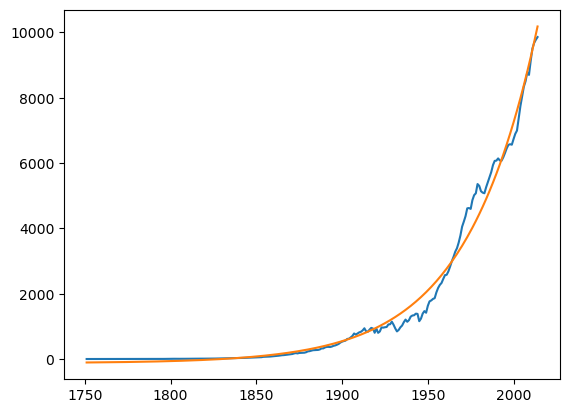

[ 2.39596800e-02 -3.90147674e+01 -1.22229282e+02]


In [3]:
# 用y=exp(a1*x+a2)+a3作为拟合函数，得到化石燃料排放的二氧化碳随时间变化的曲线
def fossil_emiss(x,a1,a2,a3): 
    return np.exp(a1*x+a2)+a3

# 设置拟合的初始值
a1=0.1
a2=0.1
a3=0
p0=[a1,a2,a3]

# 调用拟合函数
df1['Year'].astype(int)
df1['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'].astype(int)
para,cov = optimize.curve_fit(fossil_emiss, df1['Year'], df1['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'],p0=p0)

# 画真实值和拟合后的图
plt.plot(df1['Year'],df1['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'])
plt.plot(df1['Year'], fossil_emiss(df1['Year'], *para), '-', label='fit' )

plt.show()
print(para)

In [4]:
#https://zhuanlan.zhihu.com/p/484167038
# 定义没有buffer效应的碳循环函数
def model1(y,t,k12,k21):
    N1,N2,a = y #a是γ
    dydt=[-k12*N1+k21*N2+a,k12*N1-k21*N2,2.39596800e-02*a+2.39596800e-02*1.22229282e+02]
    return dydt

In [5]:
# 设置初始值
t1=np.linspace(1987, 2005) 
a=fossil_emiss(t1,*para)
k12=105/740
k21=102/900
N1=740*1000
N2=900*1000
y0=[N1,N2,a[0]] 
#转化单位
sol = odeint(model1, y0, t1, args=(k12,k21))/1000/740*347 

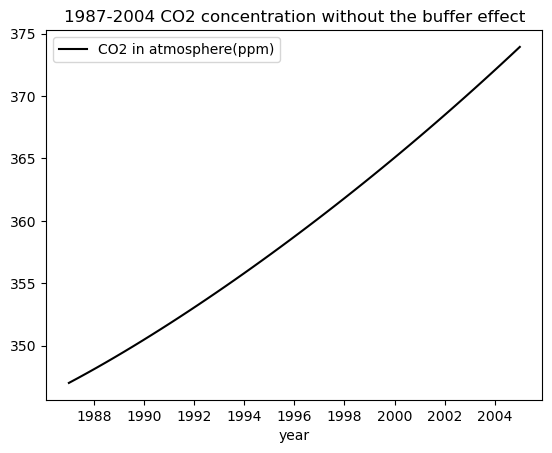

In [13]:
# 画图
from matplotlib.ticker import MaxNLocator
plt.plot(t1, sol[:, 0], 'k', label='CO2 in atmosphere(ppm)')
plt.legend(loc='best')
plt.xlabel('year')
# 设置横坐标轴刻度为整数
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('1987-2004 CO2 concentration without the buffer effect')
plt.show()

# 1.2 build a two-box model to compute the atmospheric CO2 level in ppm from 1987 to 2004(with the buffer effect)

In [7]:
# 定义有buffer效应的函数
def model2(y,t,k12,k21,N0):
    N1,N2,a2 = y
    bf=3.69+1.86e-2*(N1/740/1000*347)-1.8e-6*((N1/740/1000*347)**2) #buffer factor
    dydt=[-k12*N1+k21*(N0+bf*(N2-N0))+a2,
          k12*N1-k21*(N0+bf*(N2-N0)),
          2.39596800e-02*a2+2.39596800e-02*1.22229282e+02]
    return dydt

In [8]:
# 设置初始值
t2=np.linspace(0, 253, 253)+1751 
a2=fossil_emiss(t2,*para)

k12=105/740
k21=102/900
N0=821*1000
N1=618*1000
N2=821*1000
y0=[N1,N2,a2[0]] 
sol2 = odeint(model2, y0, t2, args=(k12,k21,N0))/740/1000*347 #计算微分方程，并且转化为ppm的单位

In [9]:
sol2

array([[ 2.89791892e+02,  3.84982432e+02, -4.84577482e-02],
       [ 2.91238045e+02,  3.83487737e+02, -4.82420907e-02],
       [ 2.91660746e+02,  3.83016713e+02, -4.80211828e-02],
       [ 2.91763603e+02,  3.82865757e+02, -4.77948966e-02],
       [ 2.91766902e+02,  3.82814589e+02, -4.75631011e-02],
       [ 2.91739337e+02,  3.82794521e+02, -4.73256623e-02],
       [ 2.91702311e+02,  3.82784156e+02, -4.70824426e-02],
       [ 2.91662489e+02,  3.82776834e+02, -4.68333014e-02],
       [ 2.91621951e+02,  3.82770480e+02, -4.65780946e-02],
       [ 2.91581350e+02,  3.82764449e+02, -4.63166743e-02],
       [ 2.91540891e+02,  3.82758540e+02, -4.60488894e-02],
       [ 2.91500644e+02,  3.82752693e+02, -4.57745849e-02],
       [ 2.91460633e+02,  3.82746889e+02, -4.54936021e-02],
       [ 2.91420870e+02,  3.82741121e+02, -4.52057783e-02],
       [ 2.91381363e+02,  3.82735390e+02, -4.49109471e-02],
       [ 2.91342120e+02,  3.82729695e+02, -4.46089378e-02],
       [ 2.91303146e+02,  3.82724038e+02

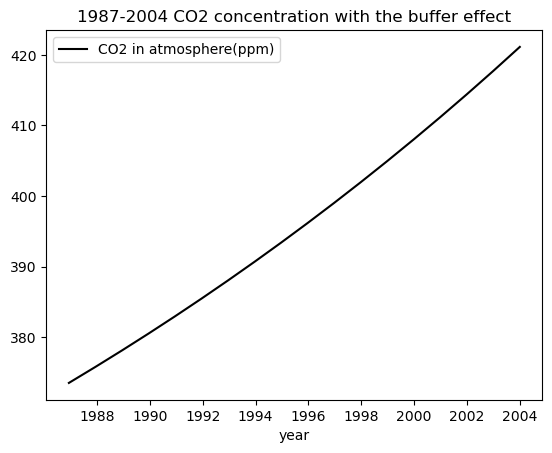

In [14]:
# 画图
plt.plot(t2[235:253], sol2[235:253,0], 'k', label='CO2 in atmosphere(ppm)')
plt.legend(loc='best')
plt.xlabel('year')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('1987-2004 CO2 concentration with the buffer effect')
plt.show()

# 1.3 reproduce Figure 2 in Tomizuka (2009) 

In [11]:
# 导入观测值数据
df2=pd.read_csv('co2_annmean_mlo.csv')
df2

,year,mean,unc
0,1959,315.98,0.12
1,1960,316.91,0.12
2,1961,317.64,0.12
3,1962,318.45,0.12
4,1963,318.99,0.12
...,...,...,...
59,2018,408.72,0.12
60,2019,411.65,0.12
61,2020,414.21,0.12
62,2021,416.41,0.12


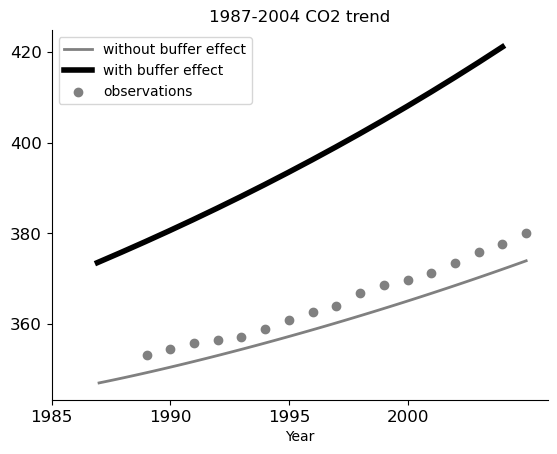

In [12]:
# 画图
plt.plot(t1, sol[:, 0], linewidth=2, color='grey') # without buffer effect
plt.plot(t2[235:253], sol2[235:253,0], linewidth=4, color='black') # with buffer effect
plt.scatter(df2['year'][30:47],df2['mean'][30:47], color='gray') # observed data
# 设置图例
plt.legend(['without buffer effect','with buffer effect','observations'],loc='best')
plt.xlabel('Year')
# 设置横纵坐标
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True)) 
plt.xticks([1985, 1990, 1995, 2000], fontsize=12)
plt.yticks([360, 380, 400, 420], fontsize=12)
# 隐藏右边和上边的边框
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('1987-2004 CO2 trend')
plt.show()
# 不考虑buffer效应时比观测值低估，可能是由于人为源排放拟合时有一定的低估，因此积分之后会出现比观测值低